# Mounting Google Drive


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path for the Data Set
path ='/content/drive/My Drive/Big Data Analytics/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'

In [ ]:
# Path for the Text file
path1 = '/content/drive/MyDrive/Big Data Analytics/test.ft.txt.bz2'
path2 = '/content/drive/MyDrive/Big Data Analytics/train.ft.txt.bz2'

# Importing Libraries 

In [ ]:
# Importing Libraries 
import pandas as pd
import numpy as np # linear algebra

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm

import bz2
from tensorflow.python.keras import models, layers, optimizers
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import bz2
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import re

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os



# Description of the Data Set

In [ ]:
# Loading the Data 
Data = pd.read_csv(path)

In [48]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [ ]:
# Displaying top 5 Rows
Data.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,manufacturer,manufacturerNumber,reviews.date,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-03-02T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-08-31T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-12-06T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2016-03-28T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",AmazonBasics,HL-002619,2017-04-22T00:00:00.000Z,2017-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [ ]:
 Data.shape

(28332, 24)

So, Data set has about 28 thousands rows and 24 columns 

# Pre Processing The Data

In [ ]:
# list of column which needed to be drop 
df = Data.drop(columns = ['id','dateUpdated','asins','brand','imageURLs','keys','manufacturer','manufacturerNumber',
           'reviews.dateSeen','reviews.id','reviews.sourceURLs','reviews.username','sourceURLs','reviews.didPurchase'])

In [ ]:
# Checking the NaN values in the data fram
df.isnull().values.any()

True

There are  NaN Values in the DataSet which need to be either drop or Fill with appropriate values. Here we are filling values with 0 because we don't want to lose the rows without NaN values

In [ ]:
# Dropping NaN Values from Df
df2 = df.fillna(0)

# Checking for any NaN Values
df2.isnull().values.any()


False

In [ ]:
df2.head()

,dateAdded,name,categories,primaryCategories,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title
0,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,2017-03-02T00:00:00.000Z,0,0.0,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...
1,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,2016-08-31T00:00:00.000Z,0,0.0,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...
2,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,2016-12-06T00:00:00.000Z,0,0.0,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...
3,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,2016-03-28T00:00:00.000Z,0,0.0,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...
4,2015-10-30T08:59:32Z,AmazonBasics AAA Performance Alkaline Batterie...,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,2017-04-22T00:00:00.000Z,0,0.0,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...


In [ ]:
df2 = df2.rename(columns={"reviews.text": "reviews", "reviews.rating": "rating", "reviews.date": "date"})

Changing the name of the products into the smaller name so it will be easy for us to visualize them without overlapping their name to each others

In [ ]:
# Abbreviation of product name
df2['name'] = df2['name'].replace('AmazonBasics AAA Performance Alkaline Batteries (36 Count)', 'Alkaline Batteries 36')
df2['name'] = df2['name'].replace('AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary', 'Alkaline Batteries 48')
df2['name'] = df2['name'].str.replace('Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers', 'Tablet with Alexa')
df2['name'] = df2['name'].str.replace('All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black', 'Fire HD Tablet')
df2['name'] = df2['name'].str.replace('Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case', ' Kids Tablet Pink')
df2['name'] = df2['name'].str.replace('Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case', 'Kids Tablet Blue')
df2['name'] = df2['name'].str.replace('Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case', 'Kids Tablet Green')
df2['name'] = df2['name'].str.replace('Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black', 'Tablet 16GB Black')
df2['name'] = df2['name'].str.replace('Fire Tablet with Alexa, 7 Display, 16 GB, Blue - with Special Offers', 'Tablet 16GB Blue')
df2['name'] = df2['name'].str.replace('All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers', 'Tablet Alexa Blue')

# Visualizing the Data Set 
We need to visualize the data set in order to understand the insights of data. 

In [ ]:
#Configuring the Matplotlib 
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['text.color'] = 'k'
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Rating Distribution
First let's have a visualize the rating distribution 

In [ ]:
%%html
<script type='text/javascript' src='https://10ax.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 200px; height: 500px;'><object class='tableauViz' width='1200' height='500' style='display:none;'><param name='host_url' value='https%3A%2F%2F10ax.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;mubctatumsystemedudev835097' /><param name='name' value='vis&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>

From the graph it can be seen that most of the products have the rating about 20,000 equals to 5 and the least rating is recorded about 616 is equal to 2. 

# Top 10 Most Reviewed Products from the Data Set

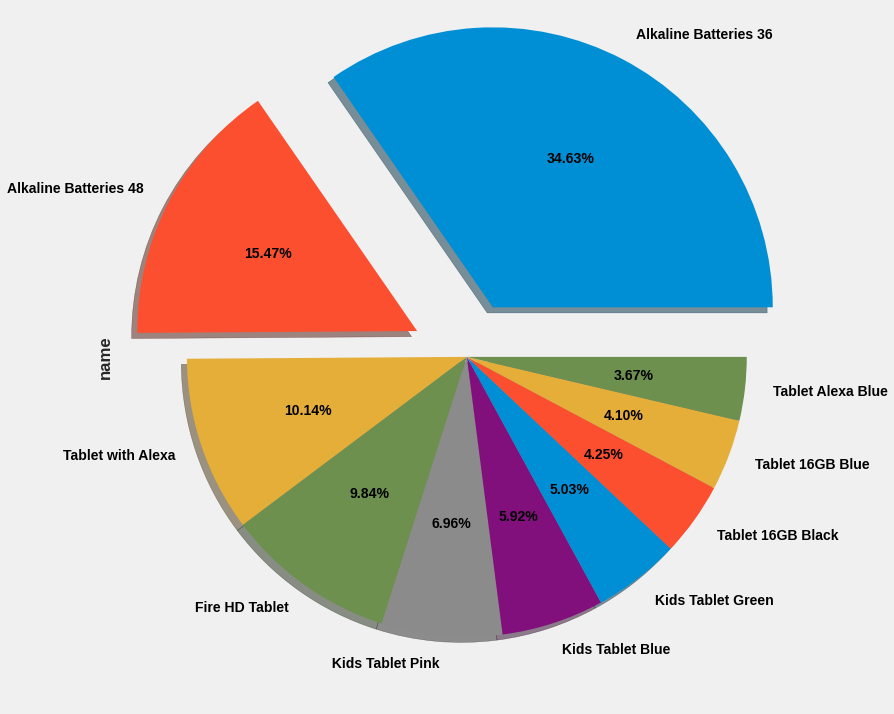

In [ ]:
plt.figure(figsize=(14,12))
explode = (0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
df2["name"].value_counts()[:10].plot.pie(explode=explode, shadow = True, autopct='%1.2f%%') 

From the Pi-Chart it can be seen that Alkaline Batteries are the most reviewed product and Tablet With Alexa comes in second number for the most viewed amazon product. 

Representaion of 10 most amazon most reviewed products in bar graph

# Product Recommendation Visualization 


In [ ]:
%%html
<script type='text/javascript' src='https://10ax.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1920px; height: 927px;'><object class='tableauViz' width='1300' height='800' style='display:none;'><param name='host_url' value='https%3A%2F%2F10ax.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;mubctatumsystemedudev835097' /><param name='name' value='vis&#47;Sheet4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>

In Above fig, product with the bigger size and the darker color have more recommendation and the product with the smaller size of block and lighter color have least recommendation  

# Visualization of Primary Categories Spending

In [ ]:
%%html
<script type='text/javascript' src='https://10ax.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1920px; height: 927px;'><object class='tableauViz' width='1200' height='600' style='display:none;'><param name='host_url' value='https%3A%2F%2F10ax.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;mubctatumsystemedudev835097' /><param name='name' value='vis&#47;Sheet6' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>

From the graph it can be seen that people are more likely to spend money on electronics items. Health & Beauty comes on second in spending money. 

# Amazon Product review in feature space 

In [ ]:
import pandas as pd
import plotly.express as px
ax = fig.add_subplot(111, projection='3d')
px.scatter_3d(df6, x='recommend', y='date', z='rating', color='rating', 
                     
                    template='plotly_dark', opacity=0.9, title='Amazon product review in feature space',
                    labels={'recommend': 'recommend', 'date': 'time', 'rating':'rating'}, )



# Sentiment Analysis 
Why Sentiment Analysis ? most of the consumers they give their feed back in the form of text but they don't bother themselves to give the rating in the form of stars or numbers and buyers they sometimes don't read the whole text of reviews and they ended up buying the wrong product. In order to save the money and time of the buyers we will do the sentiments analysis to extract the consumer sentiments from their reviews text and sentiments will be in a form of 1 and 0.
> For Example if the predicted rating is between 5 and 4 , it's mean that consumer is satisfied and if the predicted rating is less than 3 , so it's mean that consumer is not satisfied.


# Reading the text 

In [ ]:
def get_labels_and_texts(file):
    labels = []
    texts = []
    for line in bz2.BZ2File(file):
        x = line.decode("utf-8")
        labels.append(int(x[9]) - 1)
        texts.append(x[10:].strip())
    return np.array(labels), texts
train_labels, train_texts = get_labels_and_texts('../content/drive/MyDrive/Big Data Analytics/train.ft.txt.bz2')
test_labels, test_texts = get_labels_and_texts('../content/drive/MyDrive/Big Data Analytics/test.ft.txt.bz2')

# Text Preprocessing

In [ ]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = []
    for text in texts:
        lower = text.lower()
        no_punctuation = NON_ALPHANUM.sub(r' ', lower)
        no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
        normalized_texts.append(no_non_ascii)
    return normalized_texts
        
train_texts = normalize_texts(train_texts)
test_texts = normalize_texts(test_texts)

In [ ]:
print(len(train_texts))

2880000


In [ ]:
test_labels

array([1, 1, 0, ..., 0, 1, 0])

# Train/Validation Split

In [ ]:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels, random_state=57643892, test_size=0.2)

In [ ]:
MAX_FEATURES = 10000
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_texts)
train_texts = tokenizer.texts_to_sequences(train_texts)
val_texts = tokenizer.texts_to_sequences(val_texts)
test_texts = tokenizer.texts_to_sequences(test_texts)

# Padding Sequences

In [ ]:
MAX_LENGTH = max(len(train_ex) for train_ex in train_texts)
train_texts = pad_sequences(train_texts, maxlen=MAX_LENGTH)
val_texts = pad_sequences(val_texts, maxlen=MAX_LENGTH)
test_texts = pad_sequences(test_texts, maxlen=MAX_LENGTH)

# Convolutional Neural Net Model

In [ ]:
def build_model():
    sequences = layers.Input(shape=(MAX_LENGTH,))
    embedded = layers.Embedding(MAX_FEATURES, 64)(sequences)
    x = layers.Conv1D(16, 3, activation='relu')(embedded)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(3)(x)
    x = layers.Conv1D(32, 5, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(5)(x)
    x = layers.Conv1D(64, 5, activation='relu')(x)
    x = layers.GlobalMaxPool1D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(100, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model
    
model = build_model()

In [ ]:
model.fit(
    train_texts, 
    train_labels, 
    batch_size=128,
    epochs=2,
    validation_data=(val_texts, val_labels), )

Epoch 1/2
22500/22500 [==============================] - 277s 12ms/step - loss: 0.1693 - binary_accuracy: 0.9353 - val_loss: 0.1535 - val_binary_accuracy: 0.9424
Epoch 2/2
22500/22500 [==============================] - 278s 12ms/step - loss: 0.1493 - binary_accuracy: 0.9446 - val_loss: 0.1556 - val_binary_accuracy: 0.9409


In [ ]:
preds = model.predict(test_texts)
print('Accuracy score: {:0.4}'.format(accuracy_score(test_labels, 1 * (preds > 0.5))))
print('F1 score: {:0.4}'.format(f1_score(test_labels, 1 * (preds > 0.5))))
print('ROC AUC score: {:0.4}'.format(roc_auc_score(test_labels, preds)))

Accuracy score: 0.9505
F1 score: 0.9503
ROC AUC score: 0.9878


# Time Series Forecasting of the Product 

Next we will look into the time series forecasting of the products. Timeseries Forecasting would help us to determine the demand of the product over a certain time. 

Before we move forward to perform the time series analysis, we need to change the date coloumn type to datetime stamp 

In [ ]:
# Removing the hours from the date in the data set
for i in range(len(df2)):
  df2.loc[i,"date"] = "-".join(df2.loc[i, "date"][:10].split("T"))

In [ ]:
# changing the type of date coloumn to datetime
df2.date = pd.to_datetime(df2.date)
df2['date']

0       2017-03-02
1       2016-08-31
2       2016-12-06
3       2016-03-28
4       2017-04-22
           ...    
28327   2016-12-07
28328   2017-01-20
28329   2017-01-30
28330   2017-02-17
28331   2016-12-23
Name: date, Length: 28332, dtype: datetime64[ns]

Making a new data frame with the product Alkaline Batteries to perform the forecasting of the rating 

In [ ]:
# creating the new data frame df3
df3 = df2[['name','rating','date']].copy()

In [ ]:
# Filtering out the specific product 
product = df3[df3["name"] == "Alkaline Batteries 36"]

In [ ]:
product.head()

,name,rating,date
0,Alkaline Batteries 36,3,2017-03-02
1,Alkaline Batteries 36,4,2016-08-31
2,Alkaline Batteries 36,5,2016-12-06
3,Alkaline Batteries 36,5,2016-03-28
4,Alkaline Batteries 36,5,2017-04-22


In [ ]:
# Again creating a new data frame but this time with only two coloumn rating and date
product1 = product[['date','rating']].copy()

In [ ]:
# sorting the values by date in ascending order
product1.sort_values(by=['date'], inplace=True)

In [ ]:
product1.head()

,date,rating
2630,2015-03-15,5
5511,2015-03-15,3
5293,2015-03-17,5
7705,2015-03-18,3
3423,2015-03-18,5


In [ ]:
# checking the product initial rating date and current rating date
product1['date'].min(), product1['date'].max()

(Timestamp('2015-03-15 00:00:00'), Timestamp('2017-08-28 00:00:00'))

Dropping null values and aggregate rating by date

In [ ]:
product1 = product1.groupby('date')['rating'].sum().reset_index()

product1.isnull().sum()

date      0
rating    0
dtype: int64

 Indexing with Time Series Data

In [ ]:
product = product.set_index('date')
product.index

DatetimeIndex(['2017-03-02', '2016-08-31', '2016-12-06', '2016-03-28',
               '2017-04-22', '2016-02-17', '2017-04-17', '2017-04-16',
               '2016-04-07', '2017-05-24',
               ...
               '2016-01-26', '2016-04-27', '2016-04-24', '2015-06-15',
               '2016-12-07', '2016-09-27', '2016-10-25', '2016-06-24',
               '2017-04-24', '2017-05-31'],
              dtype='datetime64[ns]', name='date', length=8343, freq=None)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily ratings value for that month instead, and we are using the start of each month as the timestamp.

In [ ]:
# Taking average of the rating at the frequency MS (Month Starting)
product1 = product['rating'].resample('MS').mean()

Let's have a quick peek 2017 product rating data

In [ ]:
product1['2017':]

date
2017-01-01    4.443299
2017-02-01    4.341108
2017-03-01    4.340984
2017-04-01    4.352941
2017-05-01    4.367698
2017-06-01    4.343173
2017-07-01    4.370482
2017-08-01    4.272727
Freq: MS, Name: rating, dtype: float64

 Visualizing the rating 

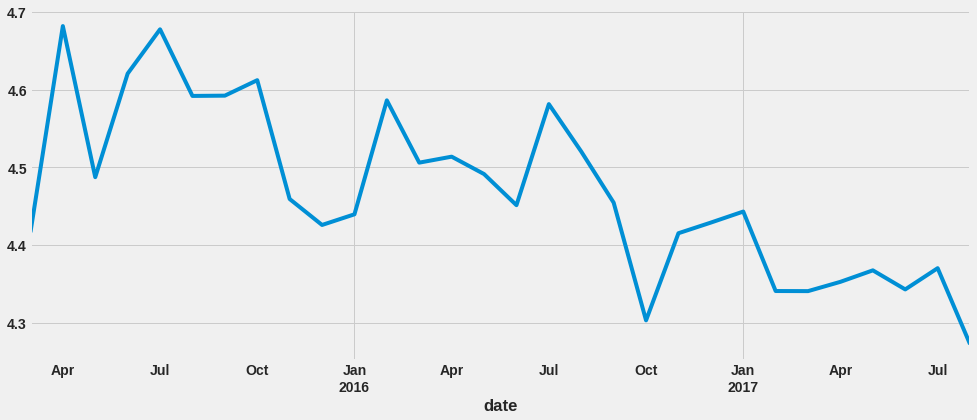

In [ ]:
product1.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as ratings are always high at the beginning of the year and low at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

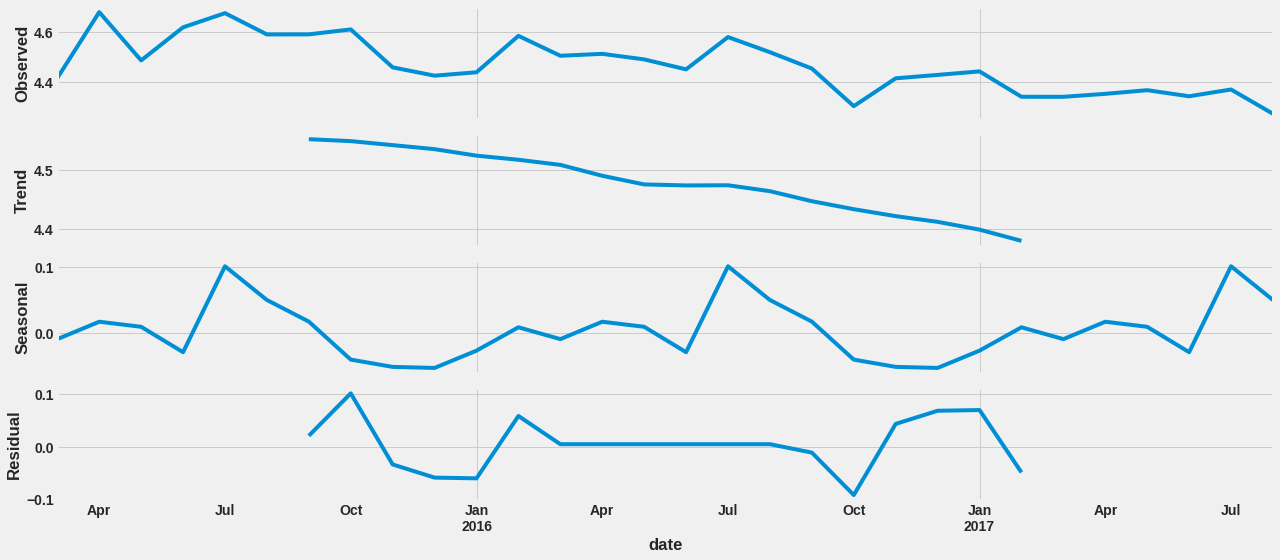

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(product1, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the rating of product is unstable, along with its obvious seasonality.

# Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average. ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter Selection for our Product's Rating ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [ ]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(product1,
                                      order = param,
                                      seasonal_order = param_seasonal,
                                      enforce_stationarity = False,
                                      enforce_invertibility = False)
      results = mod.fit()
      print('ARINA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

    except:

      continue

ARINA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:171.18518593605432
ARINA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-12.118920959384495
ARINA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-27.95670945507235
ARINA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-2.07333003547122
ARINA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:132.68825211266116
ARINA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-14.336131324989513
ARINA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-25.90530053629786
ARINA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-2.9605930515475567
ARINA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-56.39362541702475
ARINA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-18.922019751171707
ARINA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-38.01930911609316
ARINA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-11.469077982974593
ARINA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-61.80575161335955
ARINA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-21.538677537722556
ARINA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-37.944311900799306
ARINA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-9.740316148032601
ARINA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-49.00388342439034
ARINA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-17.9

The above output suggests that SARIMAX(1, 1, 1)x(0, 1, 0, 12) yields the lowest AIC value of -19.61. Therefore we should consider this to be optimal option.

In [ ]:
mod = sm.tsa.statespace.SARIMAX(product1,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0815      0.408      0.200      0.842      -0.719       0.882
ma.L1         -1.2250      0.573     -2.137      0.033      -2.349      -0.101
sigma2         0.0069      0.007      0.946      0.344      -0.007       0.021


We should always run model diagnostics to investigate any unusual behavior.

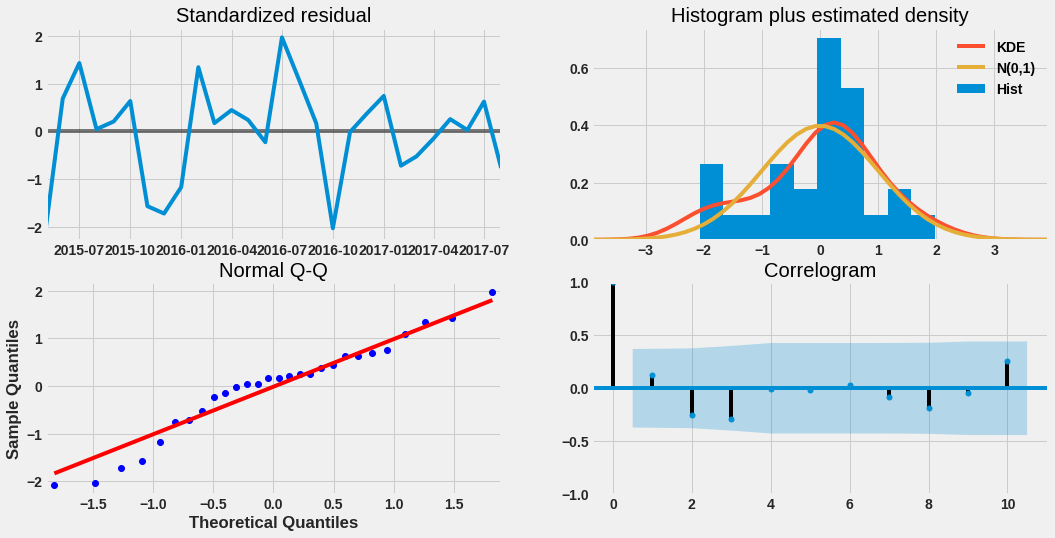

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

# Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted ratings to real ratings of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

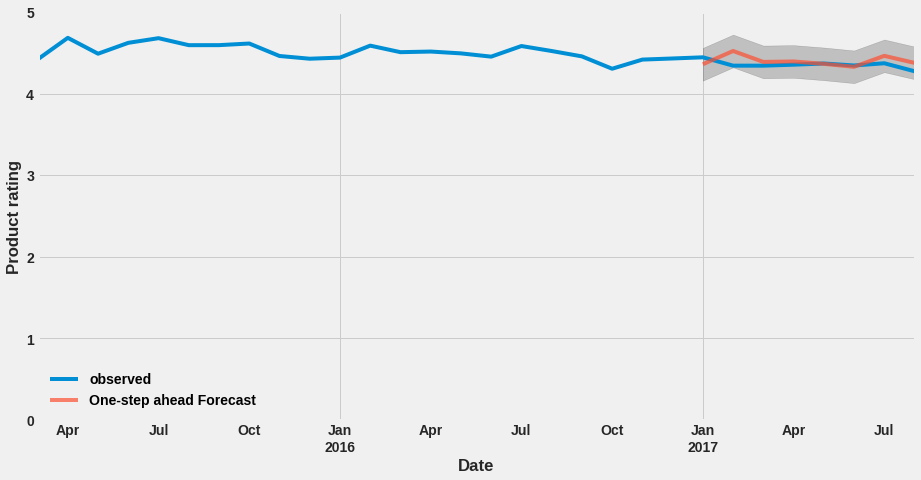

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = product1['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Product rating')
ax.set_ylim([0,5])

plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = product1['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.01


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator — it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.1


Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily product rating in the test set within 4.82 of the real raing. Our product daily rating range from around 1 to over 4. In my opinion, this is a pretty good model so far.

# Producing and visualizing forecasts

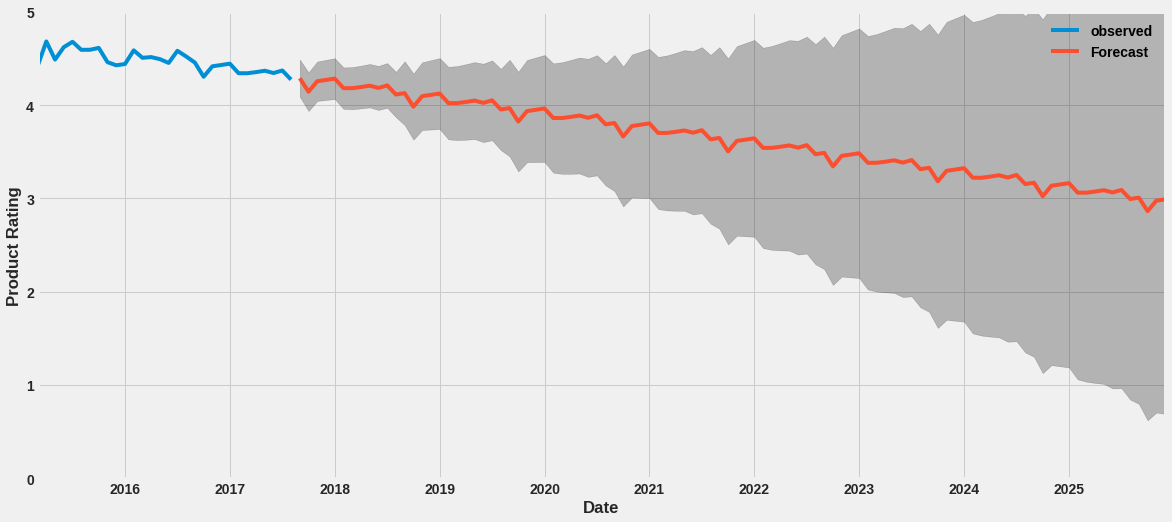

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = product1.plot(label='observed', figsize=(18, 8))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Product Rating')
ax.set_ylim([0,5])
plt.legend()
plt.show()

**Description of the graph** <br>
From the graph it can be seen that between 2015 and 2016 rating was fluctuate between 4.8 and 4.5 and then after 2017 it slightly decreases to 4.3 and continue to decrease until 2026 and in 2026 the rating of 2.9 is predicted which clearly shows the demand of this product.
<br>
It can be concluded that the demand of the AAA alkaline cell is decreasing over the time. The one reason in decreasing the demand of the cell is every electronic product such as cameras, shaving machine, electronic toys and etc are now coming with built in recharge able batteries and there will no need of AAA size cells. These Cells are only useful for TV Remotes and wall clock. <br>
This forecasting would help the manufacturer to reshape their supply according to the demand.  